# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [9]:
metadados = pd.read_csv(
    'metadados.csv')
metadados.head(10)

,Unnamed: 0,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau_True,sexo_M,posse_de_imovel_Y,posse_de_veiculo_Y
0,0,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,0,1,1,1
1,1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,0,0,1,0
2,2,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,0,1,1,1
3,3,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,0,0,0,1
4,4,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,0,0,1,0
5,5,1,Working,Secondary / secondary special,Single / not married,House / apartment,30.049315,4.438356,1,0,0,0,2.0,0,0,1,0
6,6,3,Working,Secondary / secondary special,Married,House / apartment,34.764384,3.186301,1,0,0,0,5.0,0,1,1,1
7,7,1,Commercial associate,Higher education,Married,House / apartment,32.443836,5.523288,1,0,0,0,3.0,0,1,1,0
8,8,0,Commercial associate,Secondary / secondary special,Married,House / apartment,56.169863,12.191781,1,0,1,0,2.0,0,1,1,1
9,9,2,Working,Secondary / secondary special,Married,House / apartment,43.180822,8.693151,1,0,0,0,4.0,0,0,1,1


In [10]:
metadados = metadados.drop(columns=['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])

In [11]:
metadados.isna().sum()

Unnamed: 0               0
qtd_filhos               0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau_True                 0
sexo_M                   0
posse_de_imovel_Y        0
posse_de_veiculo_Y       0
dtype: int64

In [12]:
metadados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             6770 non-null   int64  
 1   qtd_filhos             6770 non-null   int64  
 2   idade                  6770 non-null   float64
 3   tempo_emprego          6770 non-null   float64
 4   possui_celular         6770 non-null   int64  
 5   possui_fone_comercial  6770 non-null   int64  
 6   possui_fone            6770 non-null   int64  
 7   possui_email           6770 non-null   int64  
 8   qt_pessoas_residencia  6770 non-null   float64
 9   mau_True               6770 non-null   int64  
 10  sexo_M                 6770 non-null   int64  
 11  posse_de_imovel_Y      6770 non-null   int64  
 12  posse_de_veiculo_Y     6770 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 687.7 KB


In [13]:
y = metadados.mau_True

In [14]:
X = metadados.drop('mau_True', axis=1)

In [15]:
X

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_imovel_Y,posse_de_veiculo_Y
0,0,0,58.832877,3.106849,1,0,0,0,2.0,1,1,1
1,1,0,52.356164,8.358904,1,0,1,1,1.0,0,1,0
2,2,0,46.224658,2.106849,1,1,1,1,2.0,1,1,1
3,3,0,29.230137,3.021918,1,0,0,0,2.0,0,0,1
4,4,0,27.482192,4.024658,1,0,1,0,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6765,6765,1,34.857534,3.101370,1,1,1,0,1.0,0,1,0
6766,6766,0,54.109589,9.884932,1,0,0,0,2.0,0,1,0
6767,6767,0,43.389041,7.380822,1,1,1,0,2.0,0,1,0
6768,6768,0,30.005479,9.800000,1,1,0,0,2.0,1,1,1


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [23]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

In [24]:
y_chapeu_teste = clf.predict(X_test)
y_chapeu_teste

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
predict = clf.predict(X)

C:\Users\lucca\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


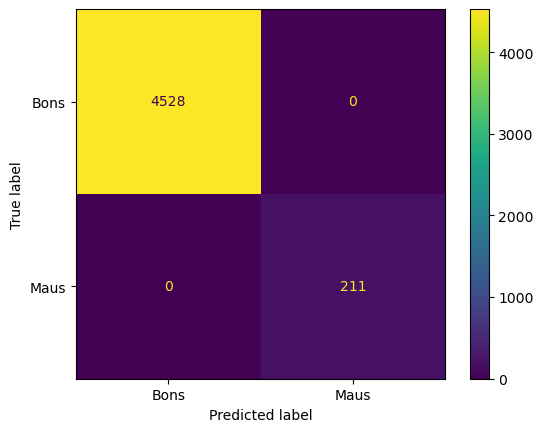

In [26]:
plot_confusion_matrix(clf, X_train,y_train, display_labels=['Bons', 'Maus']);

In [27]:
accuracy_score(y, predict)

0.9852289512555391

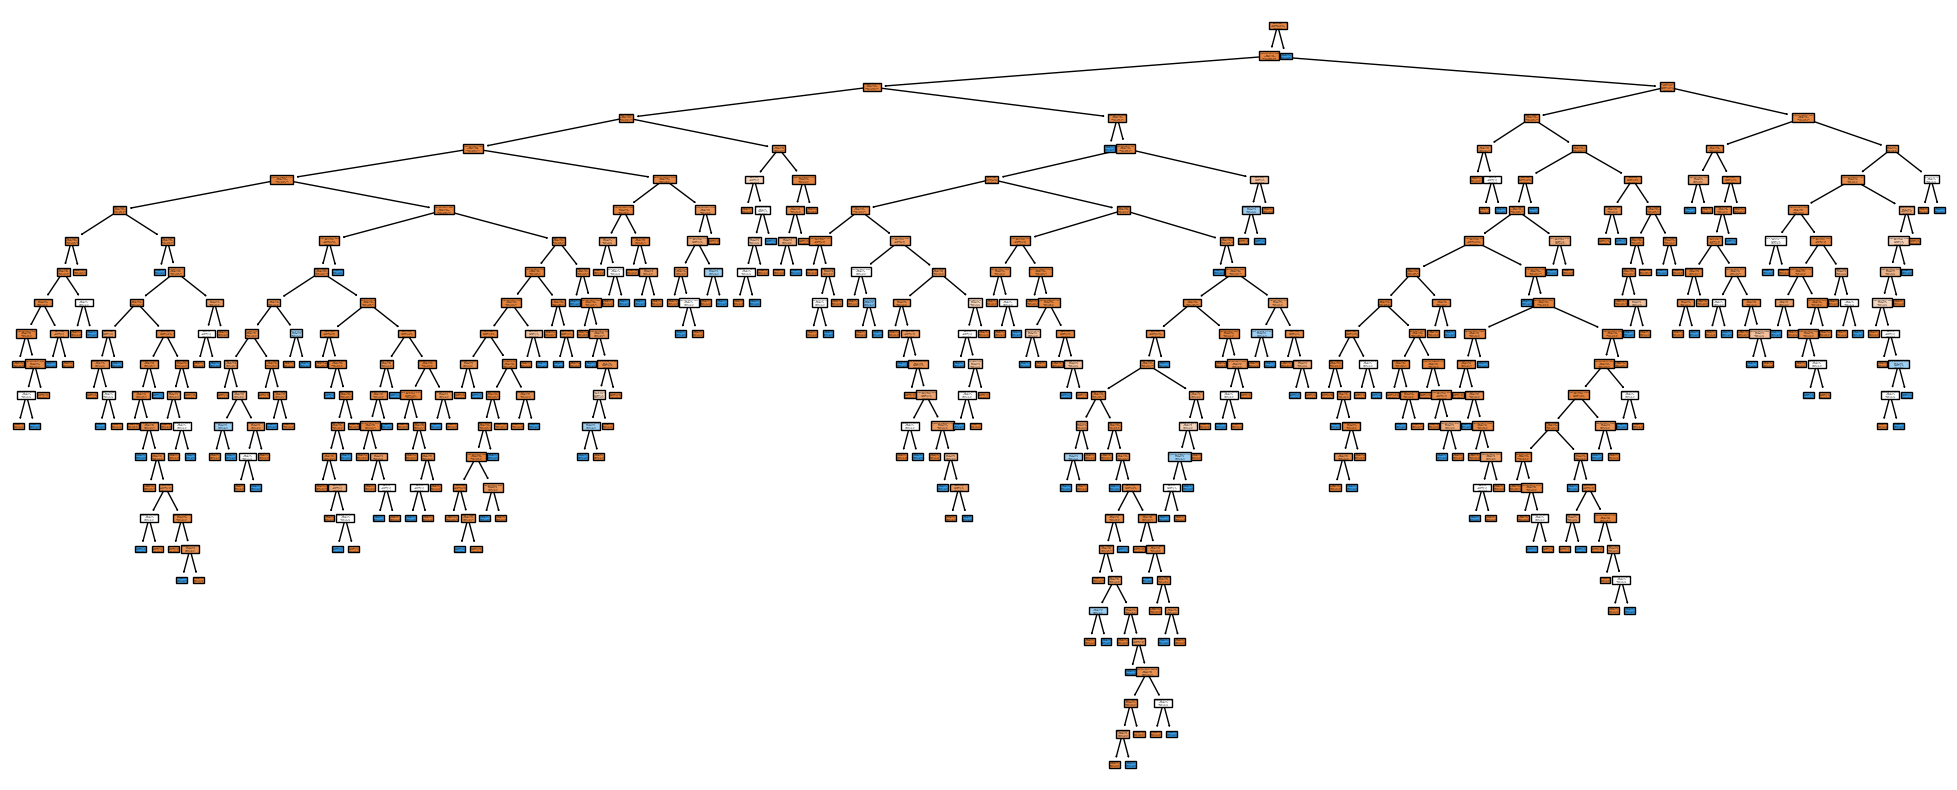

In [28]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Bons', 'Maus'],
          feature_names=X.columns);

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [34]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9768586903003447

C:\Users\lucca\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


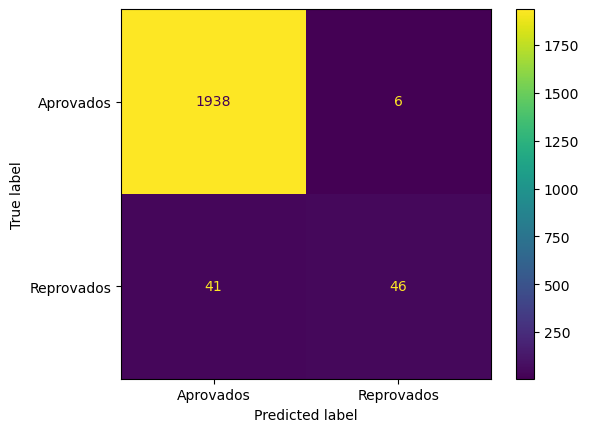

In [35]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Aprovados', 'Reprovados']);

In [36]:
accuracy_score(y_test, y_chapeu_teste)

0.9507631708517972

A acurácia do treino foi maior que a do teste, 98.5% contra 95.1%.

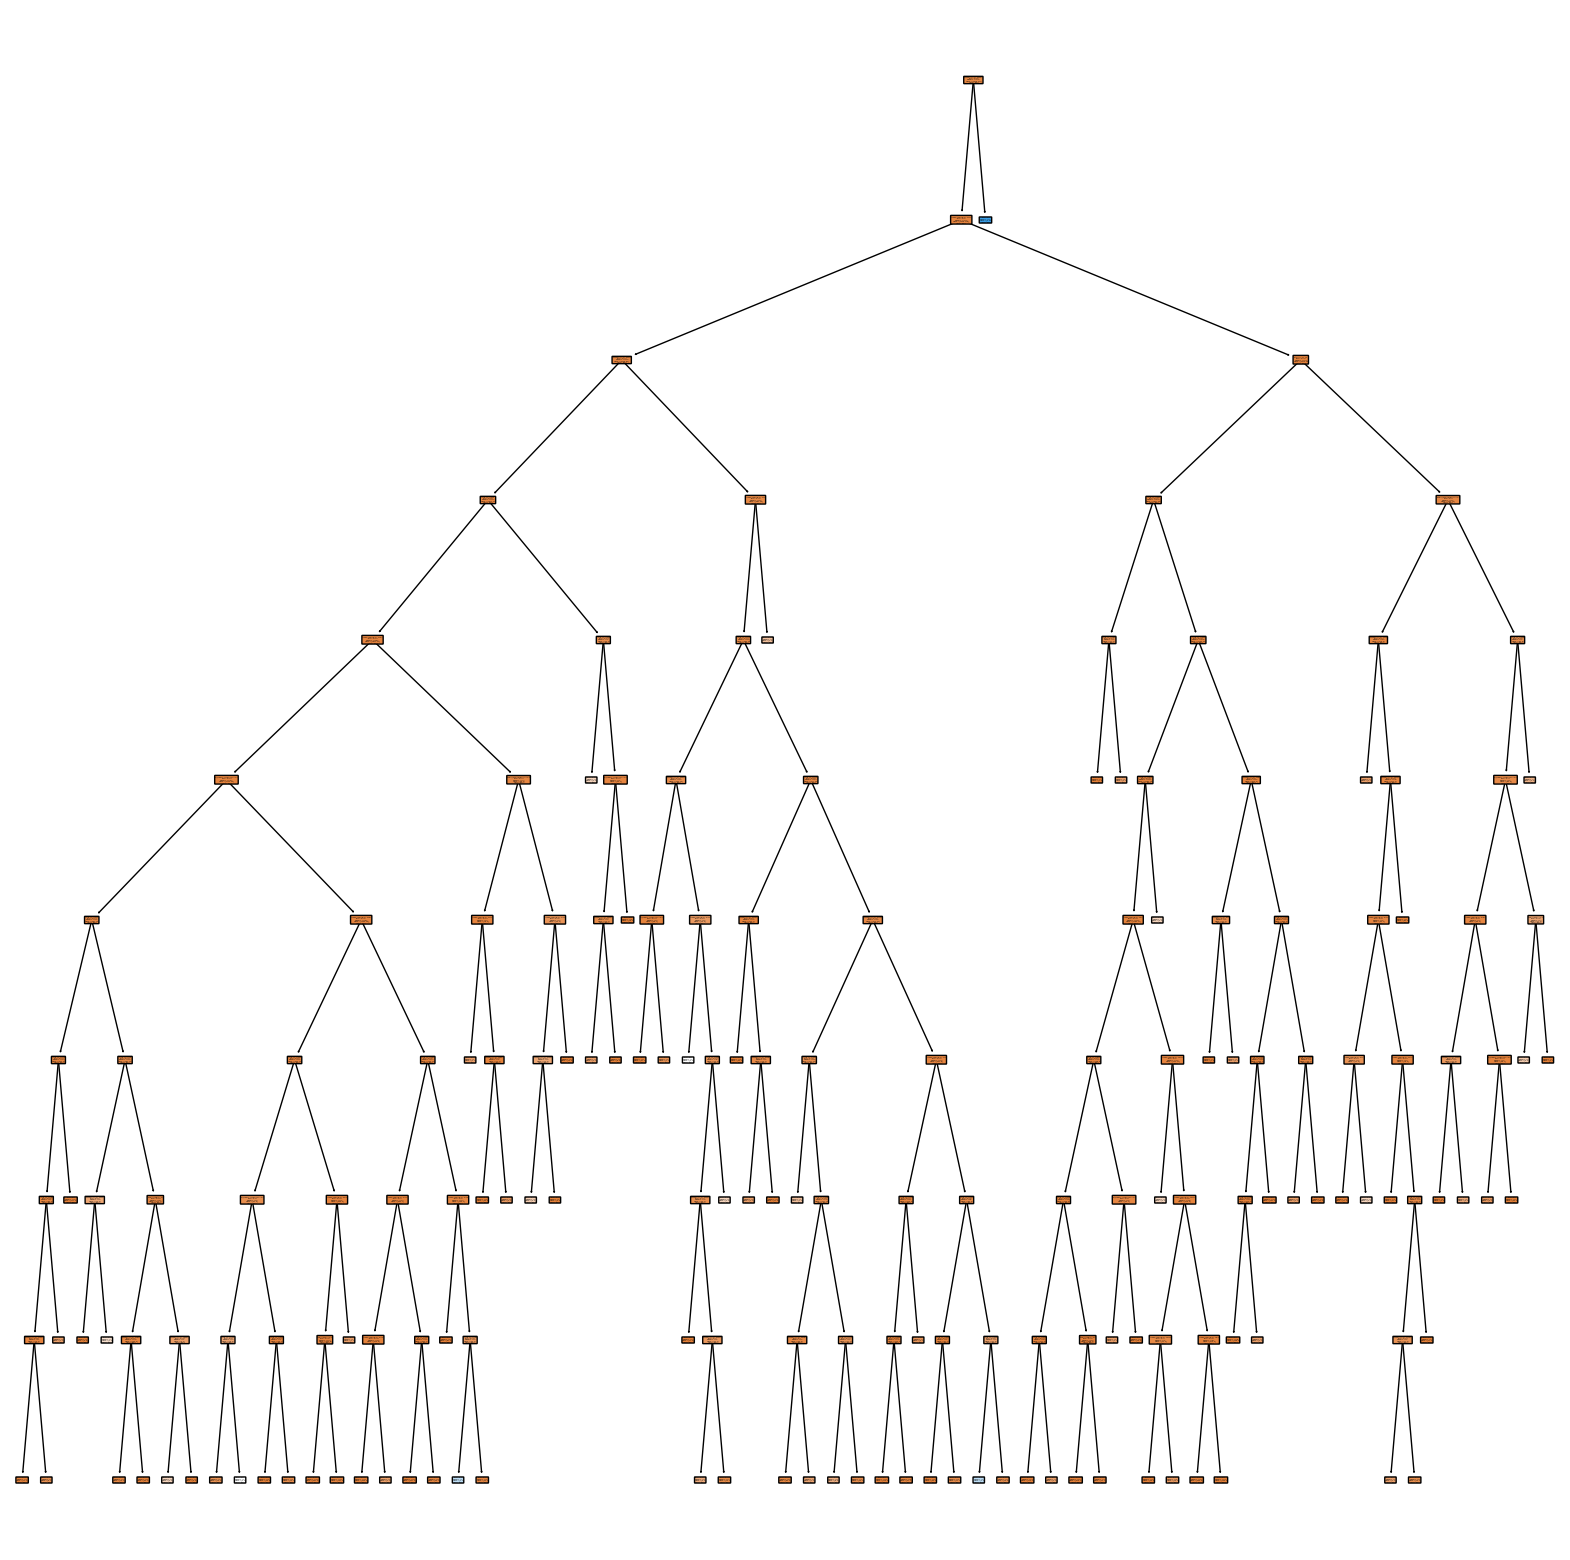

In [33]:
plt.figure(figsize=[20,20])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Bons', 'Maus'],
         feature_names=X_train.columns);

In [37]:
1938/(1938+6+41+46)

0.9542097488921714